# viewing the data from the bpnet lite example
Only just installed bpnet lite

5/21/24

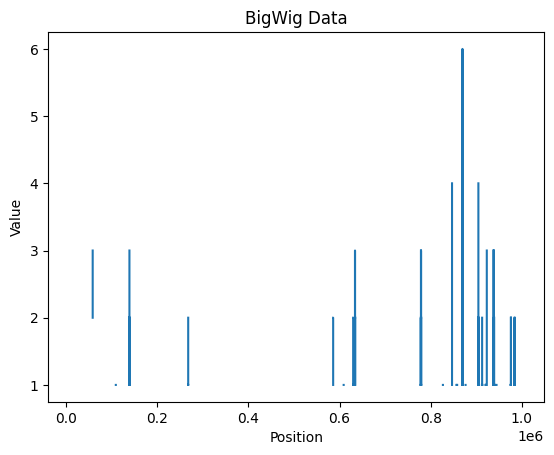

In [1]:
import pyBigWig
import matplotlib.pyplot as plt

bw = pyBigWig.open("data/chrombpnet_test/ENCSR000AKO_plus.bigWig")

values = bw.values("chr1", 0, 1000000)
plt.plot(values)
plt.xlabel("Position")
plt.ylabel("Value")
plt.title("BigWig Data")
plt.show()

# Close the .bigWig file
bw.close()

In [2]:
values #ok so mostly nan, and the rest are peaks, just turn nan to 0 I guess?

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

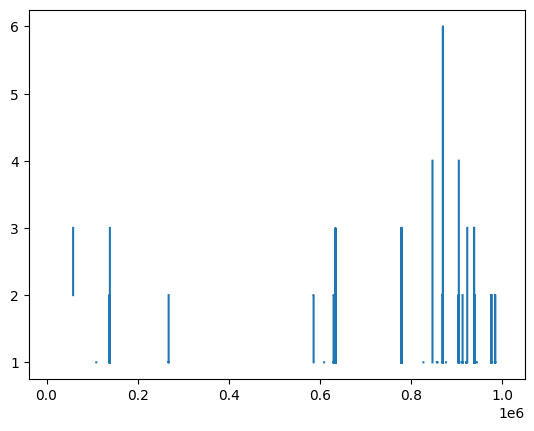

In [14]:
#replot but nan is now 0
import numpy as np
values = np.array(values)
values_new = []
for i in values:
    if i is np.nan:
        values_new.append(0)
        print('this')
    else:
        values_new.append(i)
plt.plot(values_new)

In [22]:
type(values[0])

numpy.float64

In [23]:
np.isnan(values[0])

True

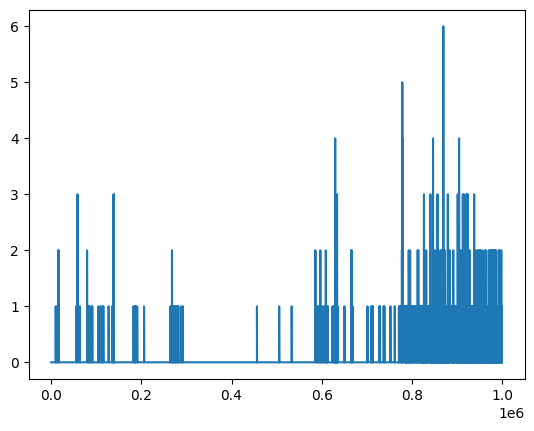

In [25]:
#replot but nan is now 0
import numpy as np
values = np.array(values)
values_new = []
for i in values:
    if np.isnan(i):
        values_new.append(0)
        # print('this')
    else:
        values_new.append(i)
plt.plot(values_new)

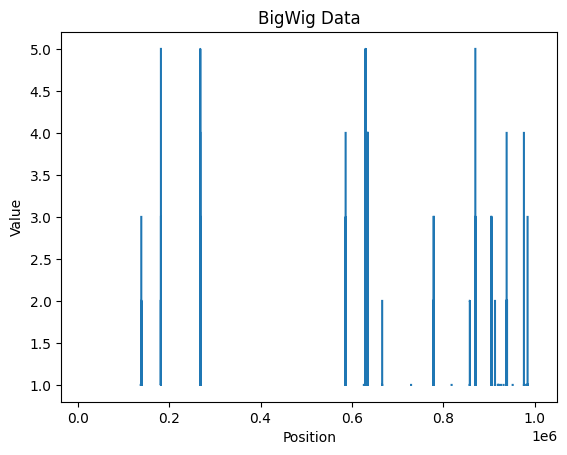

In [26]:
#now open the minus strand
bw = pyBigWig.open("data/chrombpnet_test/ENCSR000AKO_minus.bigWig")

values_minus = bw.values("chr1", 0, 1000000)
plt.plot(values_minus)
plt.xlabel("Position")
plt.ylabel("Value")
plt.title("BigWig Data")
plt.show()

# Close the .bigWig file
bw.close()

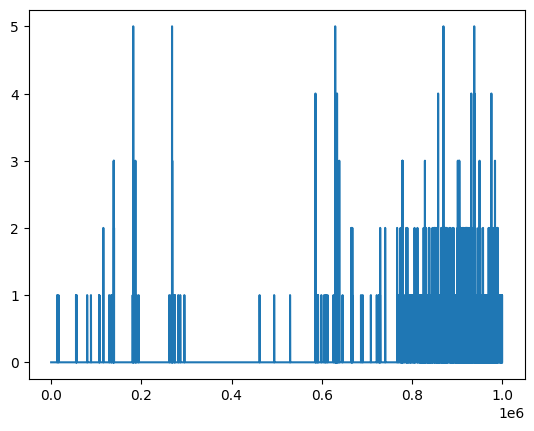

In [29]:
#replot but nan is now 0
import numpy as np
values_minus = np.array(values_minus)
values_new = []
for i in values_minus:
    if np.isnan(i):
        values_new.append(0)
        # print('this')
    else:
        values_new.append(i)
plt.plot(values_new)

In [ ]:
#the .bed file is different than what we'd expect...
#no it is from the last one which is encode 4 data from here
#https://www.encodeproject.org/experiments/ENCSR000AKO/
#make sure we are getting the encode 4 data!

In [ ]:
#we will instead use the examples in the full chrombpnet repo. This is saved in chrombpnet test
#it has 3 replicates of the bam files, and uses a separate reference genome, but we can compare it to our old reference genome
# samtools merge -f merged_unsorted.bam rep1.bam  rep2.bam  rep3.bam
# samtools sort -@4 merged_unsorted.bam -o merged.bam
# samtools index merged.bam


#chrombpnet prep splits -c hg38.chrom.subset.sizes -tcr chr11 chr12 -vcr chr8 chr10 -op splits/fold_0
#this command isn't included, so we just manually made this instead

#also one part where we have to implment it...
#chrombpnet prep nonpeaks -g ~/chrombpnet_tutorial/data/downloads/hg38.fa -p ~/chrombpnet_tutorial/data/peaks_no_blacklist.bed -c  ~/chrombpnet_tutorial/data/downloads/hg38.chrom.sizes -fl ~/chrombpnet_tutorial/data/splits/fold_0.json -br ~/chrombpnet_tutorial/data/downloads/blacklist.bed.gz -o ~/chrombpnet_tutorial/data/output
#	args = parsers.read_parser()

#made a simple test to see what args is

# python utils/test_args.py prep nonpeaks -g hg38.fa -p peaks_no_blacklist.bed -c  hg38.chrom.sizes -fl fold_0.json -br blacklist.bed.gz -o /data/output
# Namespace(cmd='prep', cmd_prep='nonpeaks', genome='hg38.fa', output_prefix='/data/output', peaks='peaks_no_blacklist.bed', chrom_sizes='hg38.chrom.sizes', chr_fold_path='fold_0.json', inputlen=2114, stride=1000, neg_to_pos_ratio_train=2, blacklist_regions='blacklist.bed.gz', seed=1234)
#can look at the parser to see what the commands like -g are, -g is genome, -p is peaks, etc.
#it's the section right after general training args!
#but we don't actually really need it, can just copy the functions over!
# so we got all of it, let's see what happens if we call that?

# python utils/prep_nonpeaks.py prep nonpeaks -g hg38.fa -p peaks_no_blacklist.bed -c  hg38.chrom.sizes -fl splits/fold_0.json -br blacklist.bed.gz -o output

#this has an issue with the args.input
#it was actually an issue with the data, we somehow downloaded the overlap file incorrectly, we'll make this process much better later on and use the built in pipelines, but for now,need to understand what it's doing! 
